<h1 p align='center'>Previsão de variáveis alvo contínuas com a Análise de Regressão</h1>
<p align='center'><img src=https://cdn.lynda.com/course/2848256/2848256-1608664963973-16x9.jpg width = 500></p>

Modelos de regressão são usados para prever variáveis alvo em escala contínua, o que os torna atraentes para abordar muitas questões da ciência. Eles também têm aplicações na indústria, como entender as relações entre variáveis, avaliar tendências ou fazer previsões. Um exemplo é prever as vendas de uma empresa nos próximos meses.

\begin{align*}
y = x_{0} + w_{1}x
\end{align*}

Aqui, o peso, $w_{0}$, representa a interseção do eixo $y$ e $w_{1}$ é o coeficiente de peso da variável explicativa. Nosso objetivo é aprender os pesos da equação linear para descrever a relação entre a variável explicativa e a variável alvo, que pode então ser usada para prever as respostas de novas variáveis explicativas que não faziam parte do conjunto de dados de treinamento.

Com base na equação linear que definimos anteriormente, a regressão linear pode ser entendida como encontrar a linha reta de melhor ajuste por meio dos exemplos de treinamento, conforme mostrado na figura a seguir:

<p align='center'><img src=https://vitalflux.com/wp-content/uploads/2022/02/simple-linear-regression-line.jpg></p>

Essa linha de melhor ajuste também é chamada de **linha de regressão**, e as linhas verticais da linha de regressão para os exemplos de treinamento são os chamados deslocamentos ou resíduos – os erros de nossa previsão.

### Regressão linear múltipla

Acima foi introduzida a regressão linear simples, um caso especial de regressão linear com uma variável explicativa. Claro, também podemos generalizar o modelo de regressão linear para múltiplas variáveis explicativas; esse processo é chamado de regressão linear múltipla:
\begin{align*}
y = x_{0}w_{0} + w_{1}x_{1} + ... w_{m}x_{m} = \sum^{n}_{i=0}w_{i}x_{i} = w^Tx
\end{align*}

<img src=https://datacadamia.com/_media/data_mining/multiple_regression_representation_hyperplane.jpg? width='500'>

Figura 1: Hiperplano com duas *features*

Como podemos ver, as visualizações de múltiplos hiperplanos de regressão linear em um gráfico de dispersão tridimensional já são difíceis de interpretar ao olhar para figuras estáticas. Como não temos bons meios de visualizar hiperplanos com duas dimensões em um gráfico de dispersão (múltiplos modelos de regressão linear ajustados a conjuntos de dados com três ou mais recursos), os exemplos e visualizações se concentrarão, principalmente, no caso univariado, usando regressão linear simples. No entanto, as regressões lineares simples e múltiplas são baseadas nos mesmos conceitos e nas mesmas técnicas de avaliação; as implementações de código que discutiremos também são compatíveis com os dois tipos de modelo de regressão.

### Carregando o conjunto de dados de Habitação em um *DataFrame*

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-3rd-edition/'
                 'master/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Visualizando as características importantes de um conjunto de dados

A análise exploratória de dados (*EDA*) é uma primeira etapa importante e recomendada antes do treinamento de um modelo de aprendizado de máquina. Usaremos algumas técnicas simples, porém úteis, da caixa de ferramentas gráfica *EDA* que podem nos ajudar a detectar visualmente a presença de *outliers*, a distribuição dos dados e os relacionamentos entre os recursos.
Primeiro, criaremos uma matriz de gráfico de dispersão que nos permitirá visualizar as correlações em pares entre os diferentes recursos desse conjunto de dados em um só lugar. Para plotar a matriz de gráfico de dispersão, usaremos a função `scatterplotmatrix` da biblioteca *MLxtend*, que é uma biblioteca *Python* que contém várias funções de conveniência para aplicativos de aprendizado de máquina e ciência de dados em *Python*.

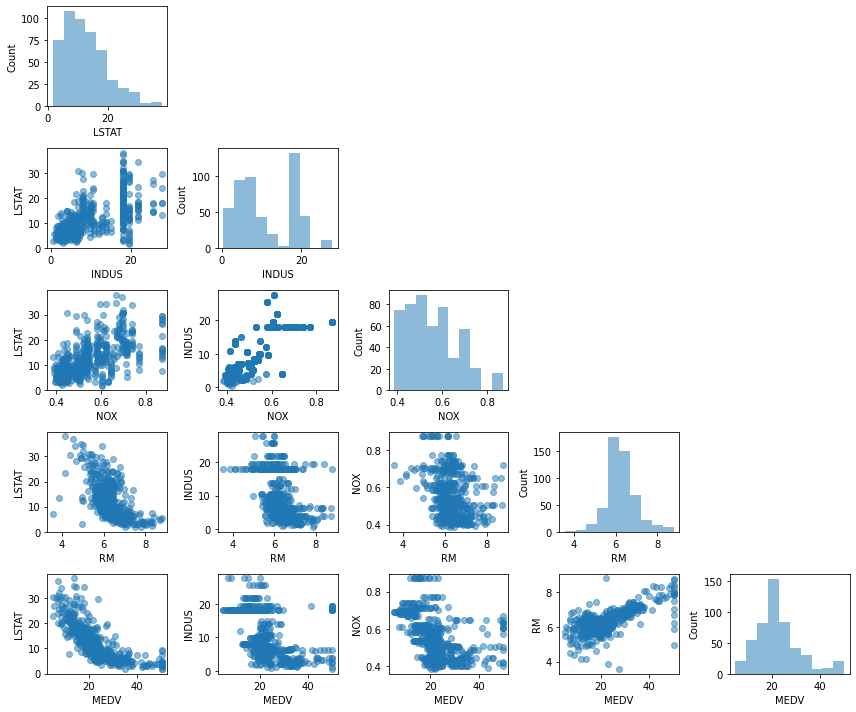

In [2]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix # Usando a Mlxtend para plotagem dos Gráficos

cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']


scatterplotmatrix(df[cols].values, figsize=(12, 10), 
                  names=cols, alpha=0.5)

plt.tight_layout()

plt.show()


Para não deixar muito poluído o espaço, plotamos apenas **cinco colunas** do conjunto de dados: *LSTAT, INDUS, NOX, RM e MEDV*. No entanto, é interessante criar uma matriz de gráfico de dispersão de todo o *DataFrame* para explorar ainda mais o conjunto de dados escolhendo nomes de coluna diferentes na chamada de função de matriz de dispersão anterior ou incluindo todas as variáveis na matriz de gráfico de dispersão omitindo o seletor de coluna.

Usando essa matriz de gráfico de dispersão, agora podemos observar rapidamente como os dados são distribuídos e se eles contêm valores discrepantes. Por exemplo, podemos ver que existe uma relação linear entre o *RM* e os preços das casas, *MEDV* (a quinta linha da quarta coluna). Além disso, podemos ver no histograma - o subtrama inferior direito na matriz do gráfico de dispersão - que a variável *MEDV* parece ser normalmente distribuída, mas contém vários valores discrepantes.

<blockquote>
<h5>Suposição de normalidade da regressão linear</h5>
<p align='justify'>Observe que, ao contrário da crença comum, treinar um modelo de regressão linear não requer que as variáveis explicativas ou alvo sejam normalmente distribuídas. A suposição de normalidade é apenas um requisito para certas estatísticas e testes de hipóteses (para obter mais informações sobre este tópico, consulte Introdução à Análise de Regressão Linear, Montgomery, Douglas C. Montgomery, Elizabeth A. Peck, e G. Geoffrey Vining, Wiley, 2012, páginas: 318-319).</p>
</blockquote>

### Olhando para os relacionamentos usando uma matriz de correlação
Visualizamos anteriomente as distribuições de dados das variáveis ​​do conjunto de dados de Habitação na forma de histogramas e gráficos de dispersão. Em seguida, criaremos **uma matriz de correlação** para quantificar e resumir as relações lineares entre as variáveis. Uma matriz de correlação está intimamente relacionada à matriz de covariância quando aplicamos a redução de dimensionalidade não supervisionada por meio da Análise de Componentes Principais. Podemos interpretar a matriz de correlação como sendo uma versão redimensionada da matriz de covariância. De fato, a matriz de correlação é idêntica a uma matriz de covariância calculada a partir de características padronizadas.

A matriz de correlação é uma matriz quadrada que contém o coeficiente de correlação produto-momento de *Pearson* (geralmente abreviado como $r$ de *Pearson*), que mede a dependência linear entre pares de recursos. Os coeficientes de correlação estão na faixa de –1 a 1. Duas características têm uma correlação positiva perfeita se $r$ = 1, nenhuma correlação se $r$ = 0 e uma correlação negativa perfeita se $r$ = –1. Como mencionado anteriormente, o coeficiente de correlação de *Pearson* pode ser simplesmente calculado como a covariância entre duas características, $x$ e $y$ (numerador), dividida pelo produto de seus desvios padrão (denominador):

\begin{align*}
r = \dfrac{\sigma_{xy}}{\sigma_{x}\sigma_{y}}
\end{align*} 

Como você pode ver na figura abaixo, a matriz de correlação nos fornece outro gráfico de resumo útil que pode nos ajudar a selecionar recursos com base em suas respectivas correlações lineares:

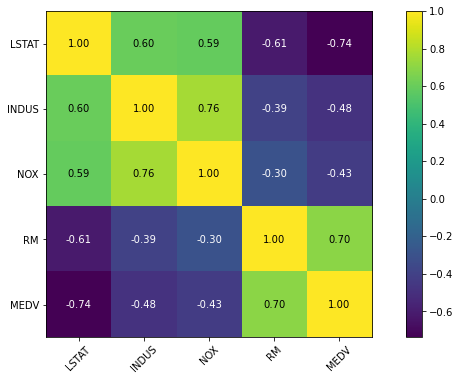

In [3]:
import numpy as np
from mlxtend.plotting import heatmap


cm = np.corrcoef(df[cols].values.T)
hm = heatmap(cm, row_names=cols, column_names=cols, figsize=(12,6))
plt.show()

Para ajustar um modelo de regressão linear, estamos interessados naqueles recursos que têm **uma alta correlação com nossa variável alvo**, *MEDV*. Observando a matriz de correlação anterior, podemos ver que nossa variável alvo, *MEDV*, apresenta a maior correlação com a *variável LSTAT (-0,74)*; no entanto, ao inspecionar a matriz do gráfico de dispersão, há uma relação não linear clara entre *LSTAT* e *MEDV*.

Por outro lado, a correlação entre *RM* e *MEDV* também é relativamente **alta (0,70)**. Dada a relação linear entre essas duas variáveis que observamos no gráfico de dispersão, *RM* parece ser uma boa escolha como variável exploratória para introduzir os conceitos de um modelo de regressão linear simples.

### Implementando um modelo de regressão linear de mínimos quadrados comum
Mencionamos que a regressão linear pode ser entendida como a obtenção da linha reta de melhor ajuste através dos exemplos de nossos dados de treinamento. No entanto, não definimos o termo melhor ajuste nem discutimos as diferentes técnicas de ajuste de tal modelo. Agora, nesta oportunidade, preencheremos as peças que faltam neste quebra-cabeça usando o método dos mínimos quadrados ordinários (OLS) (às vezes também chamado de **mínimos quadrados lineares**) para estimar os parâmetros da linha de regressão linear que minimiza a soma das distâncias verticais quadradas (resíduos ou erros) aos exemplos de treinamento.

### Resolvendo a regressão para parâmetros de regressão com *Gradiente Descent*
Considere a implementação do Neurônio Linear Adaptativo (*Adaline*), em que o neurônio artificial utiliza uma função de ativação linear. Além disso, definimos uma função de custo, $J(w)$, que minimizamos para aprender os pesos por meio de algoritmos de otimização, como *Gradiente Descent* (GD) e *Gradiente Descent* estocástico (SGD).
Esta função de custo em *Adaline* é a soma dos erros ao quadrado (SSE), que é idêntica à função de custo que usamos para OLS:

$$
\text{$J(w) = \dfrac{1}{2} \sum^{n}_{i=1}(y^{(i)} -\hat{y}^{(i)})^{2} \quad \:onde \: \hat{y} \:$ é o valor predito $\: \hat{y} = w^Tx$}
$$

